In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('app_data.csv')
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         428 non-null    float64
 1   BMI                         430 non-null    float64
 2   Sex                         430 non-null    object 
 3   Height                      430 non-null    float64
 4   Weight                      430 non-null    float64
 5   AlvaradoScore               430 non-null    int64  
 6   PediatricAppendicitisScore  430 non-null    int64  
 7   AppendixOnSono              428 non-null    object 
 8   AppendixDiameter            266 non-null    float64
 9   MigratoryPain               430 non-null    object 
 10  LowerAbdominalPainRight     429 non-null    object 
 11  ReboundTenderness           427 non-null    object 
 12  CoughingPain                429 non-null    object 
 13  PsoasSign                   393 non

In [4]:
#column dropping considering y3= AppendicitisComplications
df.drop(['DiagnosisByCriteria','TreatmentGroupBinar'],axis=1,inplace=True)

# Ultrasound
df.drop(['AppendixOnSono','AppendixDiameter','AppendixWallLayers','Kokarde','TissuePerfusion','SurroundingTissueReaction',
        'BowelWallThick','Ileus','Enteritis'],axis=1,inplace=True)

In [5]:
#df.info()

In [6]:
df_numerical = df.filter(['Age','BMI','Height','Weight','AlvaradoScore','PediatricAppendicitisScore',
                    'AppendixDiameter','BodyTemp','WBCCount','NeutrophilPerc','CRPEntry'],axis=1).copy()

In [7]:
#df_numerical.info()

In [8]:
df_categorical = df.filter(['Sex','KetonesInUrine','ErythrocytesInUrine','WBCInUrine',
                           'Peritonitis','AppendixWallLayers','TissuePerfusion'],axis=1).copy()

In [9]:
#df_categorical.info()

In [10]:
#df_categorical.head()

In [11]:
df_boolean = df.filter(['AppendixOnSono','MigratoryPain','LowerAbdominalPainRight','ReboundTenderness','CoughingPain',
                    'Nausea','AppetiteLoss','Dysuria','FreeFluids','Kokarde',
                    'SurroundingTissueReaction','PathLymphNodes','MesentricLymphadenitis','BowelWallThick','Ileus',
                    'FecalImpaction','Meteorism','Enteritis','AppendicitisComplications',
                     'PsoasSign','Stool'],axis=1).copy()

In [12]:
#df_boolean.info()

In [13]:
#df_boolean.sample(10)

In [14]:
#pandas profiling
#from pandas_profiling import ProfileReport

In [15]:
#profile = ProfileReport(df)
#profile.to_file(output_file = "AppendicitisComplications_profiling.html")

In [16]:
#perform label Encoding for categorical data

from sklearn.preprocessing import LabelEncoder
from pandas import Series
df_categorical = df_categorical.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [17]:
#df_categorical.info()

In [18]:
df_categorical.head()

,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,Peritonitis
0,1,0.0,0.0,3.0,2
1,0,NaN,NaN,NaN,2
2,1,3.0,3.0,3.0,2
3,1,3.0,3.0,3.0,1
4,0,3.0,3.0,3.0,2


In [19]:
#concatanation two dataframe
df_new = pd.concat([df_numerical,df_categorical],axis=1)

In [20]:
#df_new.info()

In [21]:
# MICE imputation
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [22]:
# Define MICE Imputer and fill missing values

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_new), columns=df_new.columns)

In [23]:
df_mice_imputed.head()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry,Sex,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,Peritonitis
0,12.531143,16.494601,159.0,41.7,7.0,5.0,38.7,13.3,66.0,76.0,1.0,0.000000,0.000000,3.000000,2.0
1,12.410678,12.595222,152.0,29.1,8.0,8.0,38.8,14.9,93.2,10.0,0.0,2.301964,2.520392,2.911358,2.0
2,10.537988,15.991247,133.5,28.5,3.0,3.0,37.2,6.6,55.3,13.0,1.0,3.000000,3.000000,3.000000,2.0
3,10.425736,16.185025,146.0,34.5,4.0,3.0,37.0,12.4,57.9,6.0,1.0,3.000000,3.000000,3.000000,1.0
4,13.270363,20.449137,164.0,55.0,2.0,2.0,37.2,4.2,50.6,2.0,0.0,3.000000,3.000000,3.000000,2.0


In [24]:
#df_mice_imputed.info()

In [25]:
#df_mice_imputed.isnull()

In [26]:
#perform labelEncoding for Boolean data
df_boolean = df_boolean.apply(lambda series:pd.Series(
      LabelEncoder().fit_transform(series[series.notnull()]),
      index = series[series.notnull()].index
   ))

In [27]:
#df_boolean.head()

In [28]:
df_boolean = df_boolean.fillna(df_boolean.mode().iloc[0])

In [29]:
#df_boolean.sample(20)

In [30]:
#df_boolean.info()

In [31]:
#concatanation two dataframe
df_final = pd.concat([df_mice_imputed,df_boolean],axis=1)

In [32]:
#df_final.info()

In [33]:
#correlation and pvalue

from scipy import stats
corr_df=pd.DataFrame(columns=['r','p'])

for col in df_final:
    print(col)
    if pd.api.types.is_numeric_dtype(df_final[col]):
        r,p = stats.pearsonr(df_final.AppendicitisComplications,df_final[col])
        corr_df.loc[col]=[round(r,3),round(p,3)]

corr_df

Age
BMI
Height
Weight
AlvaradoScore
PediatricAppendicitisScore
BodyTemp
WBCCount
NeutrophilPerc
CRPEntry
Sex
KetonesInUrine
ErythrocytesInUrine
WBCInUrine
Peritonitis
MigratoryPain
LowerAbdominalPainRight
ReboundTenderness
CoughingPain
Nausea
AppetiteLoss
Dysuria
FreeFluids
PathLymphNodes
MesentricLymphadenitis
FecalImpaction
Meteorism
AppendicitisComplications
PsoasSign
Stool


,r,p
Age,-0.098,0.042
BMI,-0.069,0.153
Height,-0.084,0.082
Weight,-0.071,0.144
AlvaradoScore,0.279,0.000
PediatricAppendicitisScore,0.255,0.000
BodyTemp,0.286,0.000
WBCCount,0.326,0.000
NeutrophilPerc,0.273,0.000
CRPEntry,0.616,0.000


In [34]:
#pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

In [35]:
df_final['AppendicitisComplications'].value_counts()

0    379
1     51
Name: AppendicitisComplications, dtype: int64

In [36]:
no = df_final[df_final.AppendicitisComplications==0]
yes = df_final[df_final.AppendicitisComplications==1]

In [37]:
print(no.shape)
print(yes.shape)

(379, 30)
(51, 30)


In [38]:
#spliting the data for training and testing

X=df_final.drop(columns='AppendicitisComplications',axis=1)
Y=df_final['AppendicitisComplications']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, stratify=Y, random_state=2)

In [40]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(430,)
(344,)
(86,)


# SMOTE technique

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)
X_test, Y_test = smt.fit_resample(X_test, Y_test)

In [42]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train == 0)))

After OverSampling, the shape of train_X: (606, 29)
After OverSampling, the shape of train_y: (606,) 

After OverSampling, counts of label '1': 303
After OverSampling, counts of label '0': 303


# Logisting Regression

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
model_score2 = model.score(X_test, Y_test)
model_score1 = model.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9092409240924092
0.9473684210526315


In [45]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, X, Y, cv=5)
#scores

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_train, Y_train, cv = kf)
result


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.81967213, 0.91803279, 0.85245902, 0.7704918 , 0.91803279,
       0.86885246, 0.81666667, 0.88333333, 0.88333333, 0.91666667])

In [47]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8647540983606558


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X_test, Y_test, cv = kf)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.9375, 1.    , 0.8   , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    ])

In [49]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9737500000000001


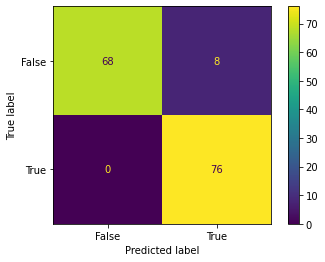

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt
 
# make predictions
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [51]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  1.0
specificity:  0.8947368421052632
PPV:  0.9047619047619048
NPV:  1.0


In [52]:
# AUROC and AUPR value
from sklearn.metrics import auc, roc_curve, precision_recall_curve

y_predictProb = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9823407202216067
AUPR: 0.9556300227663199


<function matplotlib.pyplot.show(close=None, block=None)>

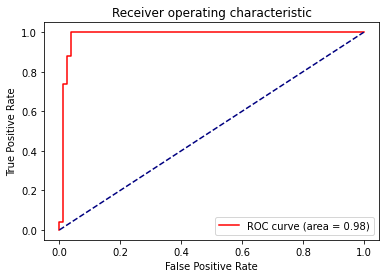

In [53]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

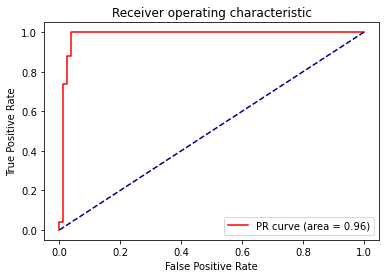

In [54]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [56]:
model_score2 = forest.score(X_test, Y_test)
model_score1 = forest.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9983498349834984
0.9407894736842105


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_train, Y_train, cv = kf)
result


array([0.86885246, 0.90163934, 0.95081967, 0.8852459 , 0.90163934,
       0.95081967, 0.96666667, 0.98333333, 0.98333333, 0.98333333])

In [58]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9375683060109289


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(forest , X_test, Y_test, cv = kf)
result

array([0.9375    , 1.        , 0.86666667, 0.93333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [60]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9737500000000001


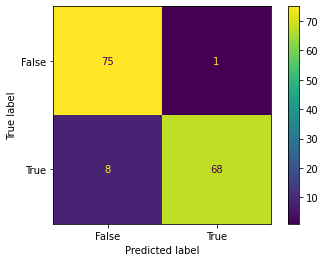

In [61]:
# make predictions
predicted = forest.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [62]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.8947368421052632
specificity:  0.9868421052631579
PPV:  0.9855072463768116
NPV:  0.9036144578313253


In [63]:
y_predictProb = forest.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.993334487534626
AUPR: 0.993707428291764


<function matplotlib.pyplot.show(close=None, block=None)>

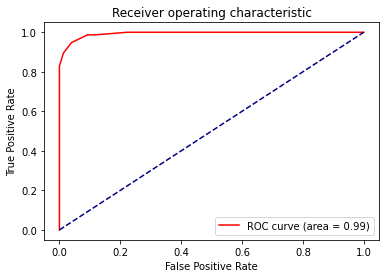

In [64]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

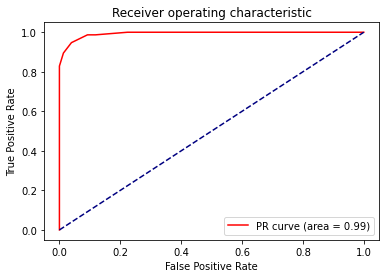

In [65]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Decision Tree

In [66]:
# using decisin tree
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [67]:
model_score2 = dclf.score(X_test, Y_test)
model_score1 = dclf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

1.0
0.8486842105263158


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_train, Y_train, cv = kf)
result


array([0.83606557, 0.86885246, 0.96721311, 0.86885246, 0.8852459 ,
       0.90163934, 1.        , 1.        , 0.96666667, 0.98333333])

In [69]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9277868852459015


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dclf , X_test, Y_test, cv = kf)
result

array([0.9375    , 0.875     , 0.93333333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [71]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9745833333333334


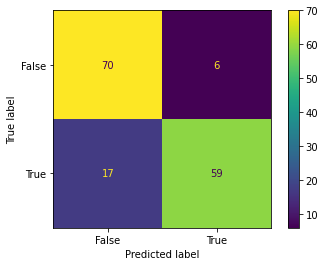

In [72]:
# make predictions
predicted = dclf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [73]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.7763157894736842
specificity:  0.9210526315789473
PPV:  0.9076923076923077
NPV:  0.8045977011494253


In [74]:
# AUROC and AUPR value
y_predictProb = dclf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.8486842105263157
AUPR: 0.8979251012145748


<function matplotlib.pyplot.show(close=None, block=None)>

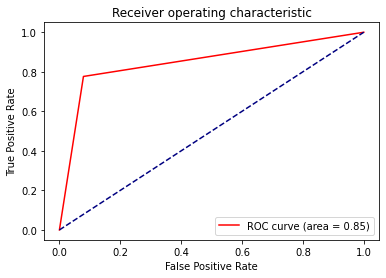

In [75]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

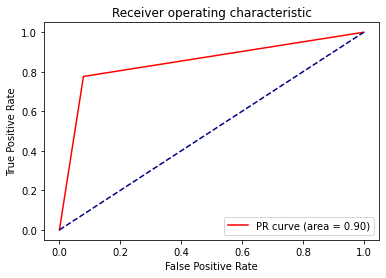

In [76]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Gradient Boost

In [77]:
#using GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
gdb.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [78]:
model_score2 = gdb.score(X_test, Y_test)
model_score1 = gdb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9455445544554455
0.9539473684210527


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_train, Y_train, cv = kf)
result

array([0.83606557, 0.86885246, 0.90163934, 0.80327869, 0.91803279,
       0.91803279, 0.98333333, 0.98333333, 1.        , 0.96666667])

In [80]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9179234972677597


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gdb , X_test, Y_test, cv = kf)
result

array([0.875     , 0.9375    , 0.86666667, 0.93333333, 0.93333333,
       1.        , 1.        , 0.93333333, 1.        , 1.        ])

In [82]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9479166666666666


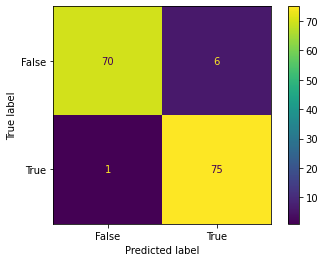

In [83]:
# make predictions
predicted = gdb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [84]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.9868421052631579
specificity:  0.9210526315789473
PPV:  0.9259259259259259
NPV:  0.9859154929577465


In [85]:
# AUROC and AUPR value
y_predictProb = gdb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9863227146814405
AUPR: 0.9841641774707156


<function matplotlib.pyplot.show(close=None, block=None)>

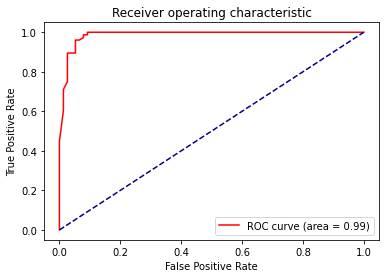

In [86]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

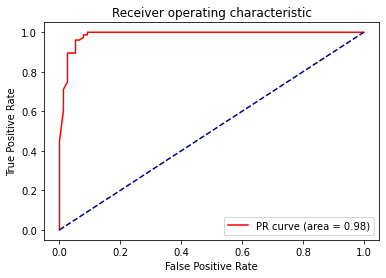

In [87]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# XGBosst

In [88]:
#using XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state = 1, n_estimators = 10, min_samples_split = 3)
xgb_clf.fit(X_train, Y_train)

[07:18:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              min_samples_split=3, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, ...)

In [89]:
model_score2 = xgb_clf.score(X_test, Y_test)
model_score1 = xgb_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.9917491749174917
0.9473684210526315


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_train, Y_train, cv = kf)
result


[07:18:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:18:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:18:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.86885246, 0.95081967, 0.95081967, 0.8852459 , 0.91803279,
       0.93442623, 1.        , 1.        , 1.        , 1.        ])

In [91]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9508196721311475


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_clf , X_test, Y_test, cv = kf)
result

[07:18:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:18:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:18:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

array([0.875     , 0.9375    , 0.93333333, 0.93333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [93]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9679166666666668


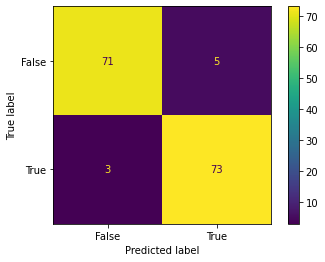

In [94]:
# make predictions
predicted = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [95]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.9605263157894737
specificity:  0.9342105263157895
PPV:  0.9358974358974359
NPV:  0.9594594594594594


In [96]:
# AUROC and AUPR value
y_predictProb = xgb_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9885734072022161
AUPR: 0.9879979856295775


<function matplotlib.pyplot.show(close=None, block=None)>

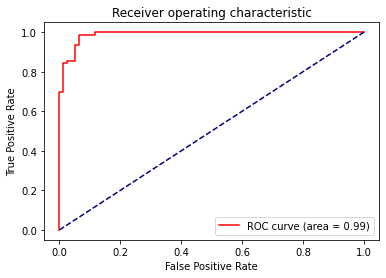

In [97]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

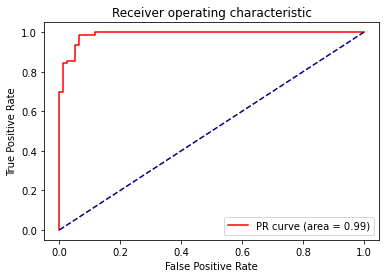

In [98]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Support Vector

In [99]:
#using support vector
from sklearn import svm
sv_clf = svm.SVC()
sv_clf.fit(X_train, Y_train)

SVC()

In [100]:
model_score2 = sv_clf.score(X_test, Y_test)
model_score1 = sv_clf.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.7706270627062707
0.881578947368421


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_train, Y_train, cv = kf)
result


array([0.78688525, 0.85245902, 0.86885246, 0.83606557, 0.85245902,
       0.78688525, 0.53333333, 0.68333333, 0.6       , 0.68333333])

In [102]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7483606557377049


In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(sv_clf , X_test, Y_test, cv = kf)
result

array([0.8125    , 1.        , 0.86666667, 1.        , 0.8       ,
       0.93333333, 0.8       , 0.8       , 0.86666667, 0.86666667])

In [104]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8745833333333334


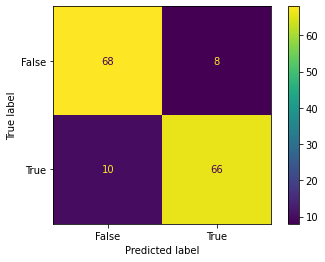

In [105]:
# make predictions
predicted = sv_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [106]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.868421052631579
specificity:  0.8947368421052632
PPV:  0.8918918918918919
NPV:  0.8717948717948718


In [107]:
# AUROC and AUPR value
y_predictProb = sv_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

In [ ]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

# Naive Bayes

In [108]:
#using Naive Bayesian 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [109]:
model_score2 = gnb.score(X_test, Y_test)
model_score1 = gnb.score(X_train, Y_train)
print(model_score1)
print(model_score2)

0.8696369636963697
0.9605263157894737


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_train, Y_train, cv = kf)
result


array([0.81967213, 0.80327869, 0.86885246, 0.78688525, 0.8852459 ,
       0.83606557, 0.85      , 0.95      , 0.85      , 0.95      ])

In [111]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.86


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(gnb , X_test, Y_test, cv = kf)
result

array([0.9375    , 0.9375    , 1.        , 0.93333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [113]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9808333333333333


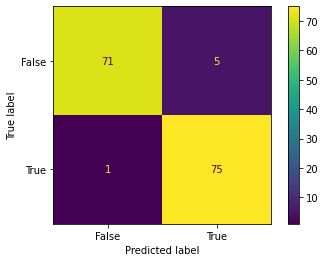

In [114]:
# make predictions
predicted = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [115]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0] 
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
ppv = (TP / float(TP + FP))
npv = (TN / float(TN + FN))

print("Sensitivity: ",sensitivity)
print("specificity: ",specificity)
print("PPV: ",ppv)
print("NPV: ",npv)

Sensitivity:  0.9868421052631579
specificity:  0.9342105263157895
PPV:  0.9375
NPV:  0.9861111111111112


In [116]:
# AUROC and AUPR value
y_predictProb = gnb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(Y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_test, y_predictProb[::,1])
area = auc(recall, precision)

print("AUROC:",roc_auc)
print("AUPR:",area)

AUROC: 0.9871883656509695
AUPR: 0.9830720354755468


<function matplotlib.pyplot.show(close=None, block=None)>

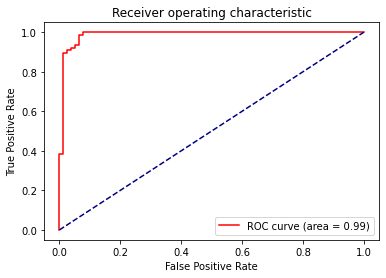

In [117]:
# AURoc graph

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

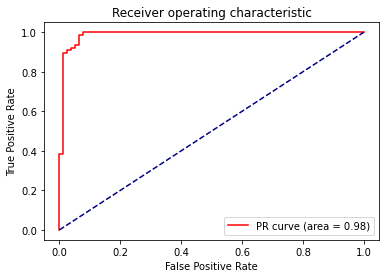

In [118]:
# AUPR graph

plt.plot(fpr, tpr, color='red', label='PR curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show